# Filtrage & Détection de contours 

# Enoncé :
I.	Filtrage des images:

1.	Appliquer un filtre moyenneur de taille 3*3, 5*5 et 7*7. Stocker les résultats.

2.	Appliquer un filtre médian de taille 3*3, 5*5 et 7*7. Stocker les résultats.

3.	Comparer les différents résultats. Lequel donne les meilleures performances ?

II.	Détection de contours:

1.	Appliquer le filtre de Sobel, Choisissez un seuil et calculer l’image contour. Stocker l’image résultante. 

2.	Appliquez le filtre Laplacien, Stocker l’image résultante.

3.	Comparer les deux images contours. Que conclure ? Comment remédier au problème ?

In [1]:
import matplotlib.image as mpimg 
import numpy as np      
import matplotlib.pyplot as plt    
from PIL import Image
from scipy import ndimage

(256, 256)

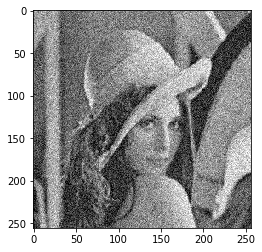

In [2]:
img = mpimg.imread("C:\\Users\\moham\\OneDrive\\Bureau\\lenab1.jpg")            # Lecture de l'image sur laquelle on va travailler
if img.dtype == np.float32:                # Si le résultat n'est pas un tableau d'entiers -> Normalisation
    img = (img * 255).astype(np.uint8) 
plt.imshow(img,cmap='gray')                            # Affichage de l'image
img.shape                                  #Extraire les longueur et largeur


# 1 Filtrage des images

## 1.1 Filtre moyenneur de taille 3*3

In [3]:
# construir less filtre 3*3 
k=0
H3= np.zeros((3, 3))               #creation de matrice avec des zeros (3,3)
for i in range(3):                #parcourir les lignes
        for j in range(3):        #parcourir les colonnes
            if k % 2 != 0 :     
                H3[i, j] =  1
            k+=1
print (H3)

[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]


In [4]:
#prendre les dimensions de l'image
n=img.shape[0]
m=img.shape[1]
    
#construire une image vide
def init(n,m):
    return np.zeros((n, m))

r0 = img_moyenne0 = init(n+2,m+2)  #n+2 pour ajouter une ligne et une colone en haut et une en bas et m+4 
            
#prendre l'image en red pour travailler dessus
for i in range(n):
        for j in range(m):
            r0[i+1,j+1] = img[i, j]

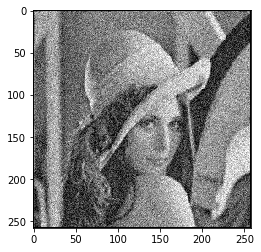

In [5]:
plt.imshow(r0,cmap='gray')

In [6]:
def f3_moyenneur(img,H):
    
    #application du filtre
    i=1
    while i < n-1: 
        j=1
        while j < m-1: 
            img_moyenne0[i][j] = np.mean(r0[i-1:i+2,j-1:j+2]*H)*9/4 #on multiplie par 15 car np.mean divise par le total 
            #des elements la matrice du masque soit 15 , puis on divise par 7 (le total des pixels concernés) 
            j+=1
        i+=1
    
    #affichage de l'image apres filtrage
    plt.imshow(img_moyenne0,cmap='gray')
    return img_moyenne0

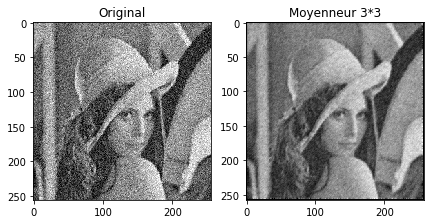

In [7]:
f, axs = plt.subplots(2,2,figsize=(7,7))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('Moyenneur 3*3')
g1=f3_moyenneur(img,H3)

## 1.2 Filtre moyenneur de taille 5*5

In [8]:
k=0
H5= np.zeros((5, 5))          
for i in range(5):                
        for j in range(5):
            if k % 2 != 0 :     
                H5[i, j] =  1
            k+=1
print (H5)

[[0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]]


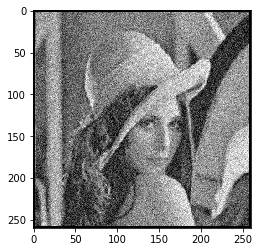

In [9]:
#prendre les dimensions de l'image
n=img.shape[0]
m=img.shape[1]
    
#construire une image vide
def init(n,m):
    return np.zeros((n, m))

r1 = img_moyenne1 = init(n+4,m+4)  #n+4 pour ajouter 2 ligne et une colone en haut et une en bas 
            
#prendre l'image en red pour travailler dessus
for i in range(n):
        for j in range(m):
            r1[i+2,j+2] = img[i, j]
plt.imshow(r1,cmap='gray')           

In [10]:
r1[i-2:i+3,j-2:j+3]

array([[ 63.,  91.,  75.,  29.,  85.],
       [ 53.,  86.,  49.,  21.,  56.],
       [ 48.,  30.,  50.,  61.,  87.],
       [ 73., 112.,  65., 114.,  93.],
       [ 95., 126.,  48., 103.,  75.]])

In [11]:
def f5_moyenneur(img,H):
    
    #application du filtre
    i=2
    while i < n-2: 
        j=2
        while j < m-2: 
            img_moyenne1[i][j] = np.mean(r1[i-2:i+3,j-2:j+3]*H)*25/12 #on multiplie par 15 car np.mean divise par le total 
            #des elements la matrice du masque soit 15 , puis on divise par 7 (le total des pixels concernés) 
            j+=1
        i+=1
    
    #affichage de l'image apres filtrage
    plt.imshow(img_moyenne1,cmap='gray')
    return img_moyenne1

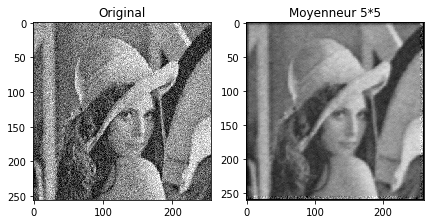

In [12]:
f, axs = plt.subplots(2,2,figsize=(7,7))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('Moyenneur 5*5')
g2=f5_moyenneur(img,H5)

## 1.3 Filtre moyenneur de taille 7*7

In [13]:
k=0
H7= np.zeros((7, 7))              
for i in range(7):             
        for j in range(7):       
            if k % 2 != 0 :     
                H7[i, j] =  1
            k+=1
print (H7)

[[0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0.]]


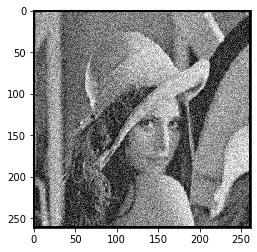

In [14]:
#prendre les dimensions de l'image
n=img.shape[0]
m=img.shape[1]
    
#construire une image vide
def init(n,m):
    return np.zeros((n, m))

r2 = img_moyenne2 = init(n+6,m+6)  #n+6 pour ajouter 3 ligne et une colone en haut et une en bas 
            
#prendre l'image en red pour travailler dessus
for i in range(n):
        for j in range(m):
            r2[i+3,j+3] = img[i, j]
plt.imshow(r2,cmap='gray')  

In [15]:
r2[i-3:i+4,j-3:j+4]

array([[128.,   0.,  97.,  98.,  22.,  73.,  23.],
       [ 61.,  65.,  44., 131.,  73.,  15.,  38.],
       [110.,  56.,  63.,  91.,  75.,  29.,  85.],
       [ 71.,  89.,  53.,  86.,  49.,  21.,  56.],
       [ 70.,  17.,  48.,  30.,  50.,  61.,  87.],
       [ 55.,  48.,  73., 112.,  65., 114.,  93.],
       [ 80.,  59.,  95., 126.,  48., 103.,  75.]])

In [16]:
def f7_moyenneur(img,H):
    
    #application du filtre
    i=3
    while i < n-3: 
        j=3
        while j < m-3: 
            img_moyenne2[i][j] = np.mean(r2[i-3:i+4,j-3:j+4]*H)*49/24 #on multiplie par 15 car np.mean divise par le total 
            #des elements la matrice du masque soit 15 , puis on divise par 7 (le total des pixels concernés) 
            j+=1
        i+=1
    
    #affichage de l'image apres filtrage
    plt.imshow(img_moyenne2,cmap='gray')
    return img_moyenne2

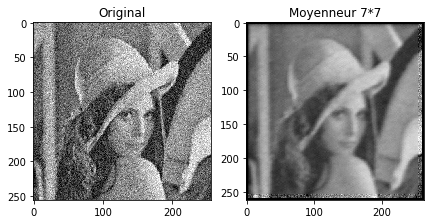

In [17]:
f, axs = plt.subplots(2,2,figsize=(7,7))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('Moyenneur 7*7')
g3=f7_moyenneur(img,H7)

## 1.4 Filtre médian de taille 3*3

In [18]:
#prendre les dimensions de l'image
n=img.shape[0]
m=img.shape[1]
    
#construire une image vide
def init(n,m):
    return np.zeros((n, m))

img_median0 = init(n+2,m+2)  #n+2 pour ajouter une ligne et une colone en haut et une en bas et m+4 
            
#prendre l'image en red pour travailler dessus
for i in range(n):
        for j in range(m):
            img_median0 [i+1,j+1] = img[i, j]

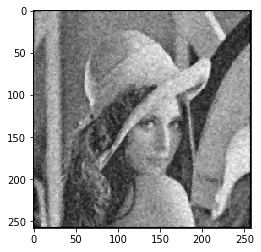

In [19]:
im_med3 = ndimage.median_filter(img_median0,size=(3,3))
plt.imshow(im_med3,cmap='gray')

## 1.5 Filtre médian de taille 5*5

In [20]:
#prendre les dimensions de l'image
n=img.shape[0]
m=img.shape[1]
    
#construire une image vide
def init(n,m):
    return np.zeros((n, m))

img_median1 = init(n+2,m+2)  #n+2 pour ajouter une ligne et une colone en haut et une en bas et m+4 
            
#prendre l'image en red pour travailler dessus
for i in range(n):
        for j in range(m):
            img_median1[i+1,j+1] = img[i, j]

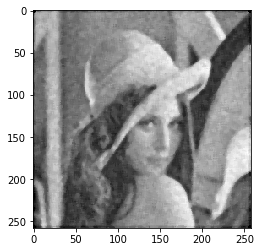

In [21]:
im_med5 = ndimage.median_filter(img_median1,size=(5,5))
plt.imshow(im_med5,cmap='gray')

## 1.4 Filtre médian de taille 7*7

In [22]:
#prendre les dimensions de l'image
n=img.shape[0]
m=img.shape[1]
    
#construire une image vide
def init(n,m):
    return np.zeros((n, m))

img_median2 = init(n+2,m+2)  #n+2 pour ajouter une ligne et une colone en haut et une en bas et m+4 
            
#prendre l'image en red pour travailler dessus
for i in range(n):
        for j in range(m):
            img_median2[i+1,j+1] = img[i, j]

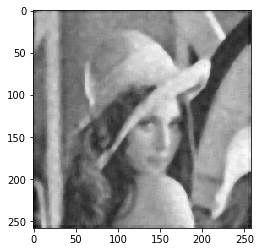

In [23]:
im_med7 = ndimage.median_filter(img_median2,size=(7,7))
plt.imshow(im_med7,cmap='gray')

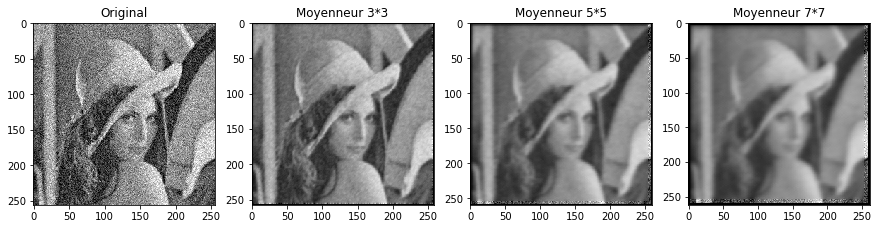

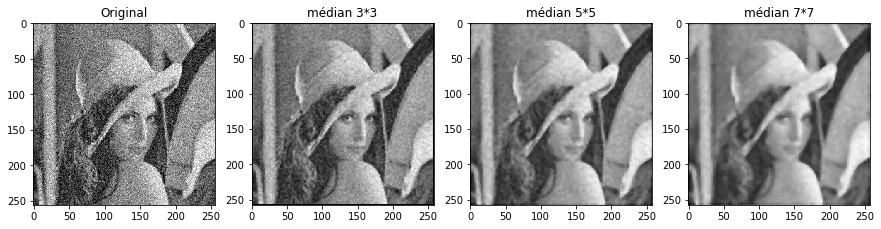

In [24]:
f, axs = plt.subplots(1,4,figsize=(15,15))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,4,2)
plt.title('Moyenneur 3*3')
g1=f3_moyenneur(img,H3)
plt.subplot(1,4,3)
plt.title('Moyenneur 5*5')
g2=f5_moyenneur(img,H5)
plt.subplot(1,4,4)
plt.title('Moyenneur 7*7')
g3=f7_moyenneur(img,H7)

f, axs = plt.subplots(1,4,figsize=(15,15))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,4,2)
plt.title('médian 3*3')
plt.imshow(im_med3,cmap='gray')
plt.subplot(1,4,3)
plt.title('médian 5*5')
plt.imshow(im_med5,cmap='gray')
plt.subplot(1,4,4)
plt.title('médian 7*7')
plt.imshow(im_med7,cmap='gray')


# 2. Détection de contours

## 2.1 Filtre Laplacien 

In [25]:
# Construction du masque de Laplacien
masque_laplacien = np.zeros((3,3))
masque_laplacien[:]=-1
masque_laplacien[1,1]=8
print(masque_laplacien)

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


In [28]:
def init(n,m):
    return np.zeros((n, m))

img_interpo = img_lapla = init(n+2,m+2) 

# fonction du filtre Laplacien
def f_lapla(img,masque_laplacien):
    
    
    i=1
    while i < n-1 :
        j=1
        while j < m-1 :
            img_lapla[i][j] = (img[i-1:i+2,j-1:j+2]*masque_laplacien).sum()
            j+=1
        i+=1
    
    img_lapla[img_lapla>=0] = 0
    img_lapla[img_lapla<0] = 1
    
    #Image de polarité
    
    x=img_lapla.shape[0]
    y=img_lapla.shape[1]
    for i in range(0,x-1):
        for j in range(0,y-1):
            if (img_lapla[i][j] == img_lapla[i][j+1]):
                img_interpo[i][j]=0
            else:
                img_interpo[i][j]=1
        
   
    plt.imshow(img_interpo,cmap='gray')


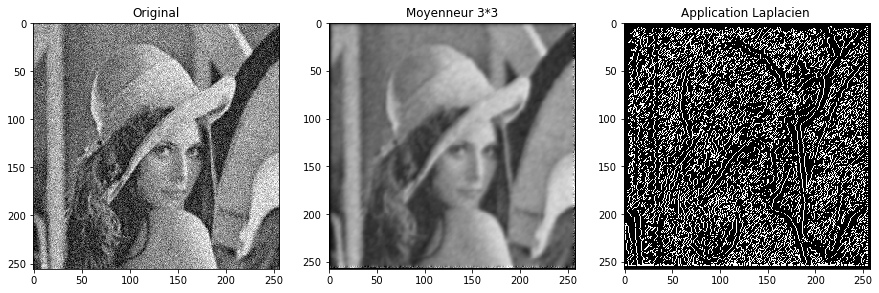

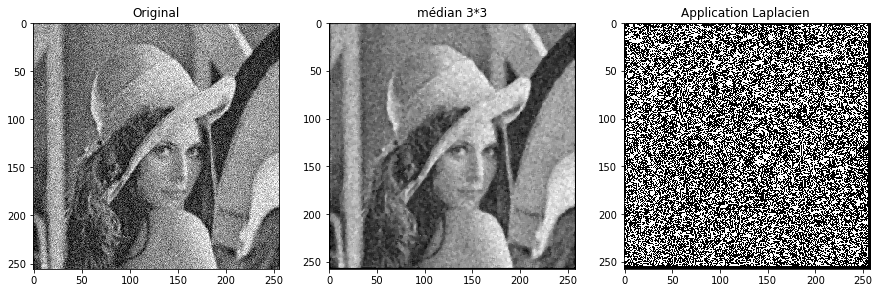

In [29]:
f, axs = plt.subplots(1,3,figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Moyenneur 3*3')
g1=f3_moyenneur(img,H3)
plt.subplot(1,3,3)
plt.title('Application Laplacien ')
f_lapla(g1,masque_laplacien)


f, axs = plt.subplots(1,3,figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('médian 3*3')
plt.imshow(im_med3,cmap='gray')
plt.subplot(1,3,3)
plt.title('Application Laplacien ')
f_lapla(im_med3,masque_laplacien)

## 2.2 Filtre Sobel

In [30]:
# Construction les 2 masque de Sobel
masque_hx = np.zeros((3,3))
masque_hx[:]= 0
masque_hx[0,0]=masque_hx[2,0]=1
masque_hx[0,2] = masque_hx[2,2]=-1
masque_hx[1,0] = 2
masque_hx[1,2] = -2
print(masque_hx)

masque_hy = np.zeros((3,3))
masque_hy[:]= 0
masque_hy[0,0]=masque_hy[0,2]=1
masque_hy[2,0] = masque_hy[2,2]=-1
masque_hy[0,1] = 2
masque_hy[2,1] = -2
print(masque_hy)


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


In [32]:
def init(n,m):
    return np.zeros((n, m))

img_sobel = img_inter = init(n+2,m+2) 

# fonction du filtre Laplacien
def f_sobel(img,masque_hx,masque_hy):
    
    
    i=1
    while i < n-1 :
        j=1
        while j < m-1 :
            hx = (img[i-1:i+2,j-1:j+2]*masque_hx).sum()
            hy = (img[i-1:i+2,j-1:j+2]*masque_hy).sum()
            img_sobel[i][j]= (hx+hy)/2
            j+=1
        i+=1
    
    img_sobel[img_sobel>=-5] = 1
    img_sobel[img_sobel<-5] = 0
    
   
    plt.imshow(img_sobel,cmap='gray')

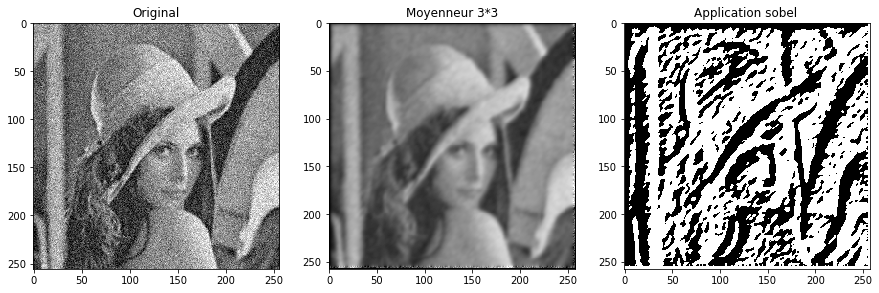

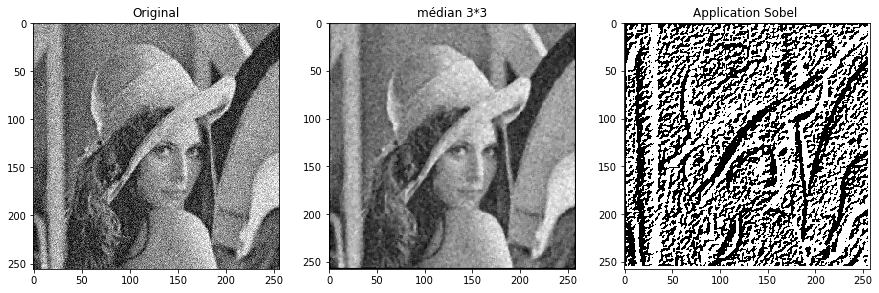

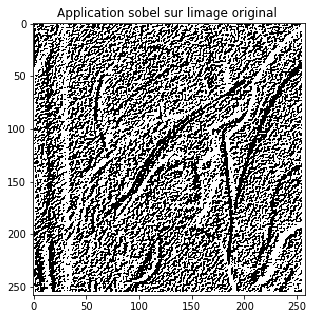

In [33]:
f, axs = plt.subplots(1,3,figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Moyenneur 3*3')
g9=f3_moyenneur(img,H3)
plt.subplot(1,3,3)
plt.title('Application sobel ')
f_sobel(g9,masque_hx,masque_hy)


f, axs = plt.subplots(1,3,figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('médian 3*3')
plt.imshow(im_med3,cmap='gray')
plt.subplot(1,3,3)
plt.title('Application Sobel ')
f_sobel(im_med3,masque_hx,masque_hy)

f, axs = plt.subplots(1,1,figsize=(5,5))
plt.subplot(1,1,1)
plt.title('Application sobel sur limage original ')
f_sobel(img,masque_hx,masque_hy)
